In [1]:
#explication de Geoffroy sur le plot de la volat

In [3]:
import numpy as np
import plotly.offline as offline
import plotly.graph_objs as go

min = -10
max = 40
K = 30
percent = 20
zoom = 1
dt = 100

# Enregistrer les traces séparément
sousJacent_data, sousJacentZoom_data, digit_data = [], [], []
pointilles_data, barriere_data = [], []

st = np.linspace(min,max,dt)

for percent in np.linspace(0, 100, 101):
    st_zoom = np.linspace(min,K-percent,dt)
    st_digit = np.linspace(K-percent,max,dt)
    st_pointilles = np.linspace(K-percent,K,dt)

    y_sousJacent = st - K 
    y_sousJacentZoom = st_zoom-K+zoom
    y_digit = np.zeros(len(st_digit))+zoom
    y_pointilles = st_pointilles-K+zoom
    
    y_barriere =  np.linspace(-percent+zoom,zoom,dt)
    x_barriere = K-percent+np.zeros(len(y_barriere))
    
    sousJacent_trace = go.Scatter(
        x=st,
        y=y_sousJacent,
        name="Sous-jacent".format(percent),
        line=dict(color="black", width=3),
        visible=False, )
    
    sousJacentZoom_trace = go.Scatter(
        x=st_zoom,
        y=y_sousJacentZoom,
        name="Sous-jacent",
        showlegend = False,
        line=dict(color="dodgerblue", width=3),
        visible=False, )    

    digit_trace = go.Scatter(
        x=st_digit,
        y=y_digit,
        name="digit",
        showlegend = False,
        line=dict(color="dodgerblue", width=3),
        visible=False, )    
    
    pointilles_trace = go.Scatter(
        x=st_pointilles,
        y=y_pointilles,
        name="Sous-jacent",
        showlegend = False,
        line=dict(color="dodgerblue", width=1.5, dash = "dash"),
        visible=False, )

    barriere_trace = go.Scatter(
        x=x_barriere,
        y=y_barriere,
        name="Barrier {} %".format(percent),
        line=dict(color="dimgray", width=1.5, dash = "dash"),
        visible=False, )
    
    sousJacent_data.append(sousJacent_trace)
    sousJacentZoom_data.append(sousJacentZoom_trace)
    digit_data.append(digit_trace)
    pointilles_data.append(pointilles_trace)
    barriere_data.append(barriere_trace)

# Afficher trace 20 par défaut
sousJacent_data[20].visible, sousJacentZoom_data[20].visible = True, True
digit_data[20].visible, pointilles_data[20].visible = True, True
barriere_data[20].visible = True


data = sousJacent_data + sousJacentZoom_data + digit_data + pointilles_data + barriere_data

percents = []

#Afficher seulement la trace actuellement
for s in range(len(sousJacent_data)):
    #Masquer toutes les données une fois
    sousJacent_visible  = [False] * len(sousJacent_data)
    sousJacentZoom_visible, digit_visible = [False] * len(sousJacentZoom_data), [False] * len(digit_data)
    pointilles_visible, barriere_visible = [False] * len(pointilles_data), [False] * len(barriere_data)
    
    #Rendre seulement le qc visible
    sousJacent_visible[s], sousJacentZoom_visible[s], digit_visible[s] = True, True, True
    pointilles_visible[s], barriere_visible[s] = True, True
    percent = dict(method="update", args=[{"visible": sousJacent_visible + sousJacentZoom_visible
                                           + digit_visible + pointilles_visible + barriere_visible},
                                          {"title": "barrier percent: {}".format(s)}])
    percents.append(percent)

sliders = [dict(active=10, currentvalue=dict(prefix="barrier: "), pad=dict(t=50), steps=percents)]

layout = go.Layout(
    title="Autocall: 10",
    xaxis=dict(title="spot"),
    yaxis=dict(title="P&L"),
    font=dict(size=16),
    hovermode='x unified',
    hoverlabel=dict(font_size=16),
    sliders=sliders,
    showlegend=True)

fig = dict(data=data, layout=layout)
offline.plot(fig, include_plotlyjs="cdn", filename="plots.html")

'plots.html'

In [78]:
data

[Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -49.81981982, ...,  39.81981982,
                  39.90990991,  40.        ])
 }),
 Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -49.81981982, ...,  39.81981982,
                  39.90990991,  40.        ])
 }),
 Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -

In [3]:
sousJacent_data

[Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -49.81981982, ...,  39.81981982,
                  39.90990991,  40.        ])
 }),
 Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -49.81981982, ...,  39.81981982,
                  39.90990991,  40.        ])
 }),
 Scatter({
     'line': {'color': 'black', 'width': 3},
     'name': 'Sous-jacent',
     'visible': False,
     'x': array([-20.        , -19.90990991, -19.81981982, ...,  69.81981982,
                  69.90990991,  70.        ]),
     'y': array([-50.        , -49.90990991, -

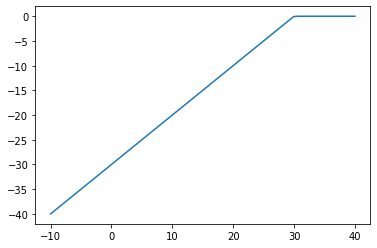

In [18]:
plt.plot(st,np.asarray([0 if K<x else x-K for x in st])) #on vend


In [12]:
import matplotlib.pyplot as plt